In [1]:
#function to print 5 rows
def five_rows(table):
    count = 0
    
    if type(table) == dict:
        for row in table:
            count += 1 
            print(row,table[row])
            if count == 5:
                break
    else:
        for row in table:
            count += 1 
            print(row)
            if count == 5:
                break

In [2]:
#CSVs in Python
#write as function
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

{'is_canceled': 'True', 'account_key': '448', 'cancel_date': '2015-01-14', 'status': 'canceled', 'is_udacity': 'True', 'days_to_cancel': '65', 'join_date': '2014-11-10'}
{'lessons_completed': '0.0', 'total_minutes_visited': '11.6793745', 'projects_completed': '0.0', 'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0'}
{'assigned_rating': 'UNGRADED', 'processing_state': 'EVALUATED', 'completion_date': '2015-01-16', 'account_key': '256', 'creation_date': '2015-01-14', 'lesson_key': '3176718735'}


In [3]:
#Fixing data types
#taken from L1_Starter_code
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [4]:
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

__Quiz: Questions about Student...__
Questions to answer during analysis
1. Does time of day for enrollment affect count or frequency of project submissions?
2. Is there a point of daily engagement which noticeably increases or decreases count of project submissions?
3. What is the average lessons completed per project submission?
4. Of students who have submitted at least 1 project, what is the average number of project submissions within 6 months of enrolling?
5. Looking only at students enrolled for at least 3 months, how many have submitted at least 1 project?
6. On average, how long does it take to complete 6 projects?

#Quiz: Investigating the data: counts unique
def unique_acc(table,col):
    accounts = []
    for account in table:
        if account[col] not in accounts:
            accounts.append(account[col])
    return len(accounts)

enrollment_num_rows = len(enrollments)            
enrollment_num_unique_students = unique_acc(enrollments,'account_key')  

engagement_num_rows = len(daily_engagement)             
engagement_num_unique_students = unique_acc(daily_engagement,'acct')  

submission_num_rows = len(project_submissions)             
submission_num_unique_students = unique_acc(project_submissions,'account_key')  

print('Enrollment count: {0}, projects count: {1}, engagement count: {2}'.format(
enrollment_num_rows,engagement_num_rows,submission_num_rows))

print('Unique enrollments: {0}, Users with project submissions: {1}, \
users with some daily activity: {2}'.format(
enrollment_num_rows,engagement_num_rows,submission_num_rows))


In [7]:
##Quiz: Investigating the data: add unique tables
def unique_table(table,variable):
    tmp_table = set()
    for record in table:
        tmp_table.add(record[variable])
    return tmp_table

unique_enrolled_students = unique_table(enrollments,'account_key')
unique_engagement_students = unique_table(daily_engagement,'acct')
unique_project_submitters = unique_table(project_submissions,'account_key')

print('unique students:',len(unique_enrolled_students))
print('unique engaged students:',len(unique_engagement_students))
print('unique project submitters:',len(unique_project_submitters))

unique students: 1302
unique engaged students: 1237
unique project submitters: 743


In [8]:
#Quiz: Problems in the data
#Unifying name for account key in all tables (dictionaries)

print(daily_engagement[3]['acct'])

for rec in daily_engagement:
    rec['account_key'] = rec['acct']
    del[rec['acct']]

print(daily_engagement[3]['account_key'])

0
0


In [9]:
#Quiz: Missing engagement reports: Looking at some missing records

missing_enrolled = []

for missing in unique_enrolled_students:
    if missing not in unique_engagement_students:
        missing_enrolled.append(missing)
        
print(missing_enrolled[0:10])

for missing in missing_enrolled[0:5]:
    for match in enrollments:
        if match['account_key'] == missing:
            print(match)

['1171', '1079', '1304', '1291', '1218', '841', '1063', '727', '997', '926']
{'is_canceled': True, 'account_key': '1171', 'cancel_date': datetime.datetime(2015, 1, 7, 0, 0), 'status': 'canceled', 'is_udacity': False, 'days_to_cancel': 0, 'join_date': datetime.datetime(2015, 1, 7, 0, 0)}
{'is_canceled': True, 'account_key': '1079', 'cancel_date': datetime.datetime(2015, 2, 9, 0, 0), 'status': 'canceled', 'is_udacity': False, 'days_to_cancel': 0, 'join_date': datetime.datetime(2015, 2, 9, 0, 0)}
{'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 59, 'join_date': datetime.datetime(2015, 1, 10, 0, 0)}
{'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 99, 'join_date': datetime.datetime(2015, 3, 10, 0, 0)}
{'is_canceled': True, 'account_key': '1291', 'cancel_date': datetime.dateti

In [10]:
#Quiz: Missing engagement reports: Looking further at cancelations

#hypothesis: cancelation on day 0 is not counted as daily engagement
#Starting by checking count of missing not canceled 
#then checking count of canceled not canceled on day 0

not_canceled = []
days_to_cancel_zero = []
canceled_later = []

for missing in missing_enrolled:
    for match in enrollments:
        if match['account_key'] == missing:
            if match['is_canceled'] == False:
                not_canceled.append(match)
            elif match['days_to_cancel'] == 0:
                days_to_cancel_zero.append(match)
            else:
                canceled_later.append(match)

print('Not canceled:',len(not_canceled))
print('Canceled first day:',len(days_to_cancel_zero))
print('Canceled later:',len(canceled_later))

Not canceled: 1
Canceled first day: 68
Canceled later: 2


In [11]:
#Quiz: Missing engagement reports: Looking at non-canceled and later-canceled

print(not_canceled)
print(canceled_later)

[{'is_canceled': False, 'account_key': '1101', 'cancel_date': None, 'status': 'current', 'is_udacity': True, 'days_to_cancel': None, 'join_date': datetime.datetime(2015, 2, 25, 0, 0)}]
[{'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 59, 'join_date': datetime.datetime(2015, 1, 10, 0, 0)}, {'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 99, 'join_date': datetime.datetime(2015, 3, 10, 0, 0)}]


In [12]:
#Quiz: Missing engagement reports: is_udacity count


#checking count of is_udacity missing engagement records
enrolled_is_udacity = []

for missing in missing_enrolled:
    for enrolled in enrollments:
        if enrolled['account_key'] == missing:
            if enrolled['is_udacity'] == True:
                enrolled_is_udacity.append(missing)
                
print('udacity testers missing from engagement:',len(enrolled_is_udacity))

udacity testers missing from engagement: 4


In [13]:
#Quiz: Missing engagement reports: is_udacity records

print(enrolled_is_udacity)


['1304', '1304', '1069', '1101']


In [14]:
for record in enrollments:
    if record['account_key'] in ('1101', '1069', '1304', '1304'):
        print(record)

{'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 59, 'join_date': datetime.datetime(2015, 1, 10, 0, 0)}
{'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 99, 'join_date': datetime.datetime(2015, 3, 10, 0, 0)}
{'is_canceled': True, 'account_key': '1069', 'cancel_date': datetime.datetime(2015, 6, 1, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 0, 'join_date': datetime.datetime(2015, 6, 1, 0, 0)}
{'is_canceled': False, 'account_key': '1101', 'cancel_date': None, 'status': 'current', 'is_udacity': True, 'days_to_cancel': None, 'join_date': datetime.datetime(2015, 2, 25, 0, 0)}


In [15]:
#Quiz: checking for more problems:
#finding number of suspicious records not canceled on day 1 (answer from video)

num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print(enrollment)
        num_problem_students += 1
        
print(num_problem_students)
#Suspecting it's the same as Udacity records, I am printing those as well
for record in enrollments:
    if record['account_key'] in ('1101', '1069', '1304', '1304'):
        if record['days_to_cancel'] != 0:
            print(record)

{'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 59, 'join_date': datetime.datetime(2015, 1, 10, 0, 0)}
{'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 99, 'join_date': datetime.datetime(2015, 3, 10, 0, 0)}
{'is_canceled': False, 'account_key': '1101', 'cancel_date': None, 'status': 'current', 'is_udacity': True, 'days_to_cancel': None, 'join_date': datetime.datetime(2015, 2, 25, 0, 0)}
3
{'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 59, 'join_date': datetime.datetime(2015, 1, 10, 0, 0)}
{'is_canceled': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 99, 'join_date': d

In [16]:
#Tracking down remainining problems
#Removing udacity accounts from data (inspired by video)
udacity_test_accounts = set()

for tester in enrollments:
    if tester['is_udacity'] == True:
        udacity_test_accounts.add(tester['account_key'])
        
print(len(udacity_test_accounts))

#function to remove testers
def remove_testers(table):
    non_testers = list()
    for record in table:
        if record['account_key'] not in udacity_test_accounts:
            non_testers.append(record) 
    return non_testers



6


In [17]:
#calling function to remove testers

non_udacity_enrollments = remove_testers(enrollments)
non_udacity_engagement = remove_testers(daily_engagement)
non_udacity_submissions = remove_testers(project_submissions)

print('enrollments before:',len(enrollments),'after:',len(non_udacity_enrollments))
print('engagement before:',len(daily_engagement),'after:',len(non_udacity_engagement))
print('submissions before:',len(project_submissions),'after:',len(non_udacity_submissions))


enrollments before: 1640 after: 1622
engagement before: 136240 after: 135656
submissions before: 3642 after: 3634


In [18]:
#Quiz: refining the question
'''
Exploration question: How do numbers in the daily engagement table differ for students who pass their first project?
Revision after identifying Q problem areas: Only look at engagement from first week,
and exclude students who cancel within a week
'''

#Creating table (dictionary). Conditions: have not canceled or have stayed enrolled more than 7 days.
#Keys account_key, values enrollment_date
paid_students = {}

for paid in non_udacity_enrollments:
    if paid['cancel_date'] == None or paid['days_to_cancel'] > 7:
        account_key = paid['account_key']
        enrollment_date = paid['join_date']
        #if statement to ensure we're keeping the latest enrollment_date
        if account_key not in paid_students or paid_students[account_key] < enrollment_date:
            paid_students[account_key] = enrollment_date

print(len(paid_students))

count = 0
for rec in paid_students:
    count += 1 
    print(rec,paid_students[rec])
    if count == 5:
        break
        

995
626 2015-03-04 00:00:00
804 2015-06-09 00:00:00
305 2015-03-10 00:00:00
93 2015-01-07 00:00:00
94 2015-04-24 00:00:00


In [19]:
#Quiz: getting data from first week, remove free trials
#half own solution, half video


def remove_free_trials(table):
    no_trials = list()
    for row in table:
        if row['account_key'] in paid_students:
            no_trials.append(row)
    return no_trials
            
paid_enrollments = remove_free_trials(non_udacity_enrollments)
paid_engagement = remove_free_trials(non_udacity_engagement)
paid_submissions = remove_free_trials(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))


1293
134549
3618


In [20]:
#Quiz: number of visits in the first week: adding has_visited column to paid_engagement table
#if has completed at least one lesson the value is 1, if not completed lesson the value is 0

for engagement in paid_engagement:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    if engagement['num_courses_visited'] == 0:
        engagement['has_visited'] = 0      

count_one = 0
count_zero = 0

#Checking how many days students completed lessons when logged in
for engagement in paid_engagement:
    if engagement['has_visited'] == 1:
        count_one += 1
    if engagement['has_visited'] == 0:
        count_zero += 1
    if engagement['has_visited'] == 'error':#!= (1 or 0):
        count_neither += 1
        
print("days students finished lessons:",count_one)
print("days students logged on, but did not finish any lessons:",count_zero)
#checking all records have has_visited field
print('total engagement:',len(paid_engagement), \
      ' records with has_visited field:',count_one+count_zero)

days students finished lessons: 36910
days students logged on, but did not finish any lessons: 97639
total engagement: 134549  records with has_visited field: 134549


In [21]:
# import timeit

# start = timeit.default_timer()

# #Quiz: getting data from first week: first week engagement
# def within_one_week(join_date, engagement_date):
#     time_delta = engagement_date - join_date
#     return time_delta.days < 7 #and time_delta.days >= 0

# engagement_first_week = list()

# for row in paid_enrollments:
#     for active in paid_engagement:
#         if within_one_week(row['join_date'],active['utc_date']):
#             engagement_first_week.append(active)
            
# stop = timeit.default_timer()

# print(stop-start)

##too slow, abandoning

In [22]:
#Quiz: getting data from first week: first week engagement
#inspired by quick look at lesson answer

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

paid_engagement_first_week = list()

for engagement in paid_engagement:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement['utc_date']
    
    if within_one_week(join_date,engagement_date):
        paid_engagement_first_week.append(engagement)
        
print(len(paid_engagement_first_week))
five_rows(paid_engagement_first_week)

6919
{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 11.6793745, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'num_courses_visited': 1}
{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 37.2848873333, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 10, 0, 0), 'num_courses_visited': 2}
{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 53.6337463333, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 11, 0, 0), 'num_courses_visited': 2}
{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 33.4892696667, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 12, 0, 0), 'num_courses_visited': 1}
{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 64.7796776667, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 13, 0, 0), 'num_

In [23]:
print(len(paid_engagement_first_week))
print(len(paid_engagement))

6919
134549


In [24]:
type(udacity_test_accounts)

set

In [25]:
#Exploring student engagement, code from video
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [26]:
#Exploring student engagement, code from video


# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [27]:
#Exploring student engagement, code from video
#My edit: made total_minutes into list, a necessity in Python 3

import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


We here see that maximum is greater than total number of hours in the week. It's time for debugging.

In [28]:
#Quiz: Debugging Data Analysis Code: identifying troublesome records

import operator

sorted_total = sorted(total_minutes_by_account.items(), key=operator.itemgetter(1),reverse=True)

minutes_in_week = 60*24*7
print('Minutes in a week: {0}'.format(minutes_in_week))

for i in sorted_total[0:10]:
    print('ID: {0}    Minutes: {1}   fraction of week: {2}'.format(i[0],round(i[1],2),round((i[1]/minutes_in_week),2)))
    

Minutes in a week: 10080
ID: 163    Minutes: 3564.73   fraction of week: 0.35
ID: 317    Minutes: 2778.32   fraction of week: 0.28
ID: 303    Minutes: 2700.49   fraction of week: 0.27
ID: 359    Minutes: 2530.56   fraction of week: 0.25
ID: 218    Minutes: 2393.54   fraction of week: 0.24
ID: 175    Minutes: 2375.8   fraction of week: 0.24
ID: 140    Minutes: 2050.12   fraction of week: 0.2
ID: 530    Minutes: 1896.75   fraction of week: 0.19
ID: 604    Minutes: 1890.99   fraction of week: 0.19
ID: 171    Minutes: 1887.39   fraction of week: 0.19


In [29]:
#Quiz: Debugging Data Analysis Code: looking at engagement records for 108

#printing records of suspicious data point (minutes spent exceeds available minutes)
count = 0
for record in paid_engagement_first_week:
    if record['account_key'] == '108':
        count += 1
        print(record)
        
print('count of first week engagement for account key 108:',count)

{'account_key': '108', 'lessons_completed': 0, 'total_minutes_visited': 25.9137858334, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 4, 20, 0, 0), 'num_courses_visited': 2}
{'account_key': '108', 'lessons_completed': 0, 'total_minutes_visited': 3.40682316667, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 4, 21, 0, 0), 'num_courses_visited': 1}
{'account_key': '108', 'lessons_completed': 0, 'total_minutes_visited': 99.1186611667, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 4, 22, 0, 0), 'num_courses_visited': 2}
{'account_key': '108', 'lessons_completed': 0, 'total_minutes_visited': 35.8316206667, 'has_visited': 1, 'projects_completed': 2, 'utc_date': datetime.datetime(2015, 4, 23, 0, 0), 'num_courses_visited': 1}
{'account_key': '108', 'lessons_completed': 0, 'total_minutes_visited': 0.0, 'has_visited': 0, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 4, 24, 0, 0), 'num_c

We see that the dates are not within one week of eachother. This indicates that the student has enrolled more than once. The next step will be to verify this assumption.

In [30]:
#Quiz: Debugging Data Analysis Code: looking for duplicates enrollment records for account key 108

for enrolled in enrollments:
    if enrolled['account_key'] == '108':
        print(enrolled)

{'is_canceled': True, 'account_key': '108', 'cancel_date': datetime.datetime(2015, 4, 20, 0, 0), 'status': 'canceled', 'is_udacity': False, 'days_to_cancel': 103, 'join_date': datetime.datetime(2015, 1, 7, 0, 0)}
{'is_canceled': True, 'account_key': '108', 'cancel_date': datetime.datetime(2015, 5, 14, 0, 0), 'status': 'canceled', 'is_udacity': False, 'days_to_cancel': 24, 'join_date': datetime.datetime(2015, 4, 20, 0, 0)}


Looking closer at the engagement records, it becomes clear that there must be something wrong with the within_one_week function: it allows engagement records older than the join date. I will correct this and run the cells again.

Now things look accurate.

In [31]:
#Quiz: Lessons completed in first week

#creating function to add total of engagement parameter per student (SQL: grouped by, count())
def total_activity(para):
    total_pairs = {}
    for account_key,amount in engagement_by_account.items():
        total_amount = 0
        for record in amount:
            total_amount += record[para]
        total_pairs[account_key] = total_amount        
    return total_pairs

total_lessons_by_account = total_activity('lessons_completed')    


In [32]:
count_zero = 0
not_zero = 0


for account,record in engagement_by_account.items():
    for para in record:
        count = 0
        if para['has_visited'] == 0 and para['lessons_completed'] == 0:
            count += 1
    if count == 0:
        count_zero += 1
    else:
        not_zero += 1
            
print(count_zero)
print(not_zero)
print(len(engagement_by_account)-not_zero-count_zero)

395
600
0


In [33]:
#Quiz: Lessons completed in first week: descriptive stats

print(len(total_lessons_by_account))

# Summarize the data about minutes spent in the classroom
#creating function to give descriptive statistics of dictionary
def desc_stats_of_dictionary(dictionary):
    total_list = list(dictionary.values())
    print('Mean:', np.mean(total_list))
    print('Standard deviation:', np.std(total_list))
    print('Minimum:', np.min(total_list))
    print('Maximum:', np.max(total_list))

desc_stats_of_dictionary(total_lessons_by_account)

995
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [34]:
#Quiz: number of visits in the first week: counting days active per account

total_active_days_per_account = total_activity('has_visited')

len(total_active_days_per_account)

995

In [35]:
#Quiz: number of visits in the first week: descriptive stats for active days
desc_stats_of_dictionary(total_active_days_per_account)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


According to lesson this is incorrect, so I have to debug a little.

#Quiz: number of visits in the first week: debugging

#removing zero activity
non_zero_total_active_by_account = {}

for account in total_active_days_per_account:
#    print(account,total_lessons_by_account[account])
    if total_active_days_per_account[account] != 0:
        non_zero_total_active_by_account[account] = total_active_days_per_account[account]
        
#getting descriptive statistics for first week only non-zero sessions
desc_stats_of_dictionary(non_zero_total_active_by_account)

In [36]:
#functions to simplify debugging
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

def group_int_dict(dictionary):
    grouped_data = {}
    for data_point in dictionary:
        if dictionary[data_point] not in grouped_data.keys():
            grouped_data[dictionary[data_point]] = 0
        grouped_data[(dictionary[data_point])] += 1
    return grouped_data

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

In [37]:
print(group_int_dict(total_active_days_per_account))

{0: 184, 1: 172, 2: 135, 3: 132, 4: 92, 5: 109, 6: 95, 7: 76}


In [38]:
# for account_key,amount in engagement_by_account.items():
#     total_amount = 0
#     for record in amount:
#         total_amount += record[para]
#     total_pairs[account_key] = total_amount        
#return total_pairs

zero_activity_accounts = list()

for account,record in engagement_by_account.items():
    count = 0
    for para in record:
        if para['has_visited'] == 0:# and para['lessons_completed'] == 0:
            count += 1
    if count == 0:
        count_zero += 1
        zero_activity_accounts.append(account)
        print(account,record)
    else:
        not_zero += 1
        
print(count_zero)
print(not_zero)
print(len(zero_activity_accounts))
print(zero_activity_accounts)

count_zero = 0
not_zero = 0

305 [{'account_key': '305', 'lessons_completed': 1, 'total_minutes_visited': 60.887327, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 3, 10, 0, 0), 'num_courses_visited': 1}, {'account_key': '305', 'lessons_completed': 0, 'total_minutes_visited': 13.7848605, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 3, 11, 0, 0), 'num_courses_visited': 2}, {'account_key': '305', 'lessons_completed': 0, 'total_minutes_visited': 71.1922911667, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 3, 12, 0, 0), 'num_courses_visited': 1}, {'account_key': '305', 'lessons_completed': 0, 'total_minutes_visited': 4.43458183333, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 3, 13, 0, 0), 'num_courses_visited': 1}, {'account_key': '305', 'lessons_completed': 1, 'total_minutes_visited': 121.454781833, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 3, 14, 0

In [39]:
#Quiz: Splitting Out Passing Students

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

#starting by taking a look at submitted projects table and other relevant objects
five_rows(project_submissions)
print("----")
five_rows(unique_project_submitters)
print("----")
five_rows(paid_students)
type(paid_students)

{'assigned_rating': 'UNGRADED', 'processing_state': 'EVALUATED', 'completion_date': datetime.datetime(2015, 1, 16, 0, 0), 'account_key': '256', 'creation_date': datetime.datetime(2015, 1, 14, 0, 0), 'lesson_key': '3176718735'}
{'assigned_rating': 'INCOMPLETE', 'processing_state': 'EVALUATED', 'completion_date': datetime.datetime(2015, 1, 13, 0, 0), 'account_key': '256', 'creation_date': datetime.datetime(2015, 1, 10, 0, 0), 'lesson_key': '3176718735'}
{'assigned_rating': 'PASSED', 'processing_state': 'EVALUATED', 'completion_date': datetime.datetime(2015, 1, 20, 0, 0), 'account_key': '256', 'creation_date': datetime.datetime(2015, 1, 20, 0, 0), 'lesson_key': '3176718735'}
{'assigned_rating': 'PASSED', 'processing_state': 'EVALUATED', 'completion_date': datetime.datetime(2015, 3, 13, 0, 0), 'account_key': '434', 'creation_date': datetime.datetime(2015, 3, 10, 0, 0), 'lesson_key': '3176718735'}
{'assigned_rating': 'INCOMPLETE', 'processing_state': 'EVALUATED', 'completion_date': datetime

dict

In [40]:
#Quiz: Splitting Out Passing Students: finding unique values for assigned_rating

unique_table(project_submissions,'assigned_rating')


{'', 'DISTINCTION', 'INCOMPLETE', 'PASSED', 'UNGRADED'}

In [41]:
#Quiz: Splitting Out Passing Students: assigning values


subway_project_lesson_keys = ['746169184', '3176718735']

passed_students = set()
non_passed_students = set()

for student in paid_students:
    for project in project_submissions:
        for lesson in subway_project_lesson_keys:
            if project['account_key'] == student:
                if project['lesson_key'] == lesson:
                    if project['assigned_rating'] in ('DISTINCTION','PASSED'):
                        passed_students.add(student)
    if student not in passed_students:
        non_passed_students.add(student)

print('passing students:',len(passed_students))
print('non-passed students:',len(non_passed_students))
print(len(paid_students))
print(len(passed_students)+len(non_passed_students))


#passing_engagement = 
#non_passing_engagement =

passing students: 647
non-passed students: 348
995
995


In [42]:
#Quiz: Splitting Out Passing Students: creating engagement tables and counting


def if_in_add(table,para,in_list):
    tmp_list = list()
    for record in table:
        if record[para] in in_list:
            tmp_list.append(record)
    return tmp_list

passing_engagement = if_in_add(paid_engagement_first_week,'account_key',passed_students)
non_passing_engagement = if_in_add(paid_engagement_first_week,'account_key',non_passed_students)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


In [43]:
#alternate way, from video
"""
len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)
"""

"\nlen(pass_subway_project)\n\npassing_engagement = []\nnon_passing_engagement = []\n\nfor engagement_record in paid_engagement_in_first_week:\n    if engagement_record['account_key'] in pass_subway_project:\n        passing_engagement.append(engagement_record)\n    else:\n        non_passing_engagement.append(engagement_record)\n\nprint len(passing_engagement)\nprint len(non_passing_engagement)\n"

In [44]:
five_rows(passing_engagement)
print("------")
five_rows(non_passing_engagement)

{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 11.6793745, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'num_courses_visited': 1}
{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 37.2848873333, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 10, 0, 0), 'num_courses_visited': 2}
{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 53.6337463333, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 11, 0, 0), 'num_courses_visited': 2}
{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 33.4892696667, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 12, 0, 0), 'num_courses_visited': 1}
{'account_key': '0', 'lessons_completed': 0, 'total_minutes_visited': 64.7796776667, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 13, 0, 0), 'num_cours

In [45]:
#Comparing the two student groups

#Looking at average time of day the students who passed and didn't passed were active

passing_engagement_time_of_day = {}

for session in passing_engagement:
    passing_engagement_time_of_day[session['account_key']] = session['utc_date']#.total_seconds()
                                   
#for session in non_passing_engagement:
#    passing_engagement_time_of_day[session['account_key']: session['utc_date'].total_seconds()

five_rows(passing_engagement_time_of_day)



374 2015-02-12 00:00:00
626 2015-03-10 00:00:00
551 2015-04-30 00:00:00
468 2015-04-08 00:00:00
305 2015-03-16 00:00:00


In [46]:
#Taking a look at the full engagement data

daily_engagement_full = read_csv('daily_engagement_full.csv')

five_rows(daily_engagement_full)

{'sibling_key': 'ud359', 'has_visited': '0.0', 'registration_date': '2014-08-05', 'acct': '448', 'utc_date': '2014-11-05', 'account_key': '2257038596', 'lessons_completed': '0.0', 'total_minutes_visited': '0.0', 'projects_completed': '0.0', 'course_title': 'Intro to Data Science', 'course_key': 'ud359-nd', 'subscription_start': '2014-11-05'}
{'sibling_key': 'ud120', 'has_visited': '0.0', 'registration_date': '2014-08-05', 'acct': '448', 'utc_date': '2014-11-05', 'account_key': '2257038596', 'lessons_completed': '0.0', 'total_minutes_visited': '0.0', 'projects_completed': '0.0', 'course_title': 'Intro to Machine Learning', 'course_key': 'ud120-nd', 'subscription_start': '2014-11-05'}
{'sibling_key': 'ud651', 'has_visited': '0.0', 'registration_date': '2014-08-05', 'acct': '448', 'utc_date': '2014-11-05', 'account_key': '2257038596', 'lessons_completed': '0.0', 'total_minutes_visited': '0.0', 'projects_completed': '0.0', 'course_title': 'Data Analysis with R', 'course_key': 'ud651-nd', '

I have to abandon looking at average time of day the students were active - I just don't have the data.

In [47]:
#Comparing the two student groups

#looking at average number of completed lessons per study session for the different groups.
##Excluding days student logged on, but did not visit any courses
#

passing_engagement_lessons_completed = {}
non_passing_engagement_lessons_completed = {}

for session in passing_engagement:
#    if session['has_visited'] == 1:
        passing_engagement_lessons_completed[session['account_key']] \
        = session['lessons_completed']
    
for session in non_passing_engagement:
#    if session['has_visited'] == 1:
        non_passing_engagement_lessons_completed[session['account_key']] \
        = session['lessons_completed']
    
five_rows(passing_engagement_lessons_completed)
print("------")
five_rows(non_passing_engagement_lessons_completed)

print('passing count:',len(passing_engagement_lessons_completed))
print('non-passing count:',len(non_passing_engagement_lessons_completed))

374 0
626 0
551 0
468 0
305 0
------
804 0
718 0
1049 0
866 0
1247 0
passing count: 647
non-passing count: 348


In [48]:
#Comparing the two student groups
#descriptive statistics for lessons completeted per study day (session)
print('passed students')
desc_stats_of_dictionary(passing_engagement_lessons_completed)

print('')

print('non-passed students')
desc_stats_of_dictionary(non_passing_engagement_lessons_completed)

passed students
Mean: 0.301391035549
Standard deviation: 0.694679212846
Minimum: 0
Maximum: 6

non-passed students
Mean: 0.137931034483
Standard deviation: 0.585699577637
Minimum: 0
Maximum: 6


In [49]:
print("The students who passed their first project completed on average {0}% more lessons \
per day than the non passing students".format((0.33/0.49)*100))

The students who passed their first project completed on average 67.34693877551021% more lessons per day than the non passing students


In [50]:
#Comparing the two student groups

#I got curious about how many minutes were spent total as well \
#(I didn't really see that variable before), so I decided to create \
#a function.

def passing_vs_not(variable):
    passing_engagement_dict = {}
    non_passing_engagement_dict = {}

    for session in passing_engagement:
    #    if session['has_visited'] == 1:
            passing_engagement_dict[session[variable]] \
            = session[variable]

    for session in non_passing_engagement:
    #    if session['has_visited'] == 1:
            non_passing_engagement_dict[session['account_key']] \
            = session[variable]

    print('{0} passing count:'.format(variable),len(passing_engagement_dict))
    print('{0} non-passing count:'.format(variable),len(non_passing_engagement_dict))
    print('-----------')
    desc_stats_of_dictionary(passing_engagement_dict)
    print('-----------')
    desc_stats_of_dictionary(non_passing_engagement_dict)

In [51]:
passing_vs_not('total_minutes_visited')

total_minutes_visited passing count: 2191
total_minutes_visited non-passing count: 348
-----------
Mean: 116.52084531
Standard deviation: 115.217745369
Minimum: 0.0
Maximum: 1030.88319667
-----------
Mean: 20.1359475316
Standard deviation: 60.7016245569
Minimum: 0.0
Maximum: 518.360104833


In [52]:
group_data(passing_engagement,'lessons_completed')

defaultdict(list,
            {0: [{'account_key': '0',
               'has_visited': 1,
               'lessons_completed': 0,
               'num_courses_visited': 1,
               'projects_completed': 0,
               'total_minutes_visited': 11.6793745,
               'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
              {'account_key': '0',
               'has_visited': 1,
               'lessons_completed': 0,
               'num_courses_visited': 2,
               'projects_completed': 0,
               'total_minutes_visited': 37.2848873333,
               'utc_date': datetime.datetime(2015, 1, 10, 0, 0)},
              {'account_key': '0',
               'has_visited': 1,
               'lessons_completed': 0,
               'num_courses_visited': 2,
               'projects_completed': 0,
               'total_minutes_visited': 53.6337463333,
               'utc_date': datetime.datetime(2015, 1, 11, 0, 0)},
              {'account_key': '0',
               'has_v

In [53]:
#Quiz: Making histogram: preparing data
%matplotlib inline
import matplotlib.pyplot as plt

passing_engagement_grouped = group_data(passing_engagement,'account_key')
non_passing_engagement_grouped = group_data(non_passing_engagement,'account_key')

In [54]:
desc_stats_of_dictionary(sum_grouped_items(passing_engagement_grouped,'lessons_completed'))

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


In [55]:
#Looking at passing records with a large amount of lessons completed
grouped_lessons_completed = sum_grouped_items(passing_engagement_grouped,'lessons_completed')


count = 0

large_lessons_completed = []

for record in grouped_lessons_completed:
    if grouped_lessons_completed[record] > 7:
        count += 1
        print(record,grouped_lessons_completed[record])
        large_lessons_completed.append(record)
        
        
print(count)

272 8
21 12
125 9
39 10
164 15
175 10
218 20
403 15
430 9
110 9
569 13
496 8
361 10
310 9
359 9
197 9
48 12
633 36
317 17
266 10
355 10
47 13
604 8
316 9
651 8
513 8
13 10
649 8
314 9
163 20
518 8
526 18
425 8
270 9
34


In [56]:
#taking a closer look at the account with the largest amounts of lessons completed
for session in passing_engagement:
    if session['account_key'] == '633':
        print(session)

{'account_key': '633', 'lessons_completed': 10, 'total_minutes_visited': 489.042620667, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 17, 0, 0), 'num_courses_visited': 4}
{'account_key': '633', 'lessons_completed': 8, 'total_minutes_visited': 264.106566334, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 18, 0, 0), 'num_courses_visited': 2}
{'account_key': '633', 'lessons_completed': 3, 'total_minutes_visited': 173.814019, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 19, 0, 0), 'num_courses_visited': 1}
{'account_key': '633', 'lessons_completed': 6, 'total_minutes_visited': 259.304326334, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 20, 0, 0), 'num_courses_visited': 2}
{'account_key': '633', 'lessons_completed': 2, 'total_minutes_visited': 108.428018, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 21, 0, 0), '

In [57]:
#Looking at passing records with a small amount of lessons completed
grouped_lessons_completed = sum_grouped_items(passing_engagement_grouped,'lessons_completed')


count_zero = 0
count_one = 0

zero_lessons_completed = []
one_lesson_completed = []

for record in grouped_lessons_completed:
    if grouped_lessons_completed[record] == 0:
        count_zero += 1
        #print(record,grouped_lessons_completed[record])
        zero_lessons_completed.append(record)
    elif grouped_lessons_completed[record] == 1:
        count_one += 1
        #print(record,grouped_lessons_completed[record])
        one_lesson_completed.append(record)
        
        
print('count zero:',count_zero)
print('count one:',count_one)

count zero: 256
count one: 128


In [58]:
#taking a closer look at some passing project accounts with the 0 lessons completed
for session in passing_engagement:
    if session['account_key'] == '587':
        print(session)

{'account_key': '587', 'lessons_completed': 0, 'total_minutes_visited': 0.0, 'has_visited': 0, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 5, 28, 0, 0), 'num_courses_visited': 0}
{'account_key': '587', 'lessons_completed': 0, 'total_minutes_visited': 0.0, 'has_visited': 0, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 5, 29, 0, 0), 'num_courses_visited': 0}
{'account_key': '587', 'lessons_completed': 0, 'total_minutes_visited': 0.0, 'has_visited': 0, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 5, 30, 0, 0), 'num_courses_visited': 0}
{'account_key': '587', 'lessons_completed': 0, 'total_minutes_visited': 0.0, 'has_visited': 0, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 5, 31, 0, 0), 'num_courses_visited': 0}
{'account_key': '587', 'lessons_completed': 0, 'total_minutes_visited': 9.64132116667, 'has_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 6, 1, 0, 0), 'num_courses_visited': 1}
{'account_k

In [59]:
count = 0
zero_lessons_set = set()
for session in passing_engagement:
    if session['has_visited'] == 1 and session['account_key'] in zero_lessons_completed:
        count += 1
        zero_lessons_set.add(session['account_key'])
        
print(count)
print(len(zero_lessons_set))

371
169


In [61]:
from ipywidgets import *
from IPython.display import display

display(Box(height ='10px'))

In [65]:
#Creating histogram method

def histogram(table,variable,x_label,plot_title,high=None,divider=1,cumu=False):
    grouped_values = list(sum_grouped_items(table,variable).values())
    
#Allowing for converting to other unit. Will commonly be used for convering between units of time.
    if divider != 1:
        grouped_values[:] = [i/divider for i in grouped_values]
    
    min_val = int(min(grouped_values))
    max_val = int(max(grouped_values))

#Allowing to set number of bars, in case of large number of values
    if high == None:
        high = max_val + 1
    
    plt.figure(figsize=(10,5))
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel('Proportion')
    
    #Making sure each value corresponds to a bin, by checking if min_val is 0
    if min_val == 0:
        plt.hist(grouped_values,range=[min_val,max_val],
           bins=high,color='g',normed=True,histtype='bar',cumulative=cumu)
    else:
        plt.hist(grouped_values,range=[min_val,max_val],
           bins=high,color='g',normed=True,histtype='bar',cumulative=cumu)


divider=60

grouped_values = list(sum_grouped_items(passing_engagement_grouped,'total_minutes_visited').values())

#b = grouped_values
grouped_values[:] = [i/divider for i in grouped_values]
#print(b)
#if divider != 1:   
#    for i in grouped_values:
#        i = (i/divider)
#        print(i)
print('-------------------')
print(grouped_values)

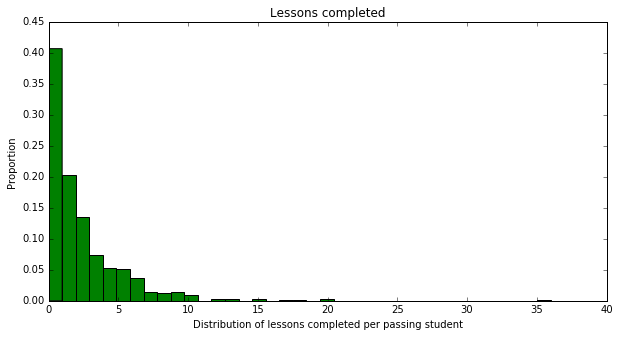

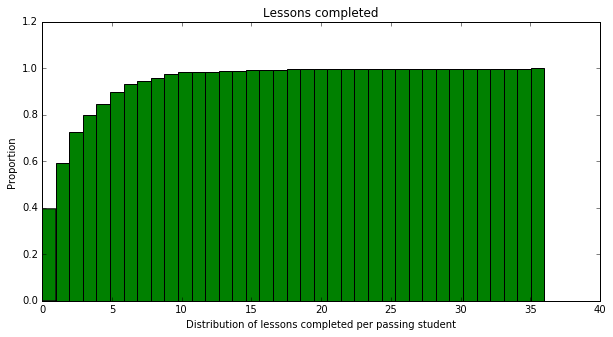

In [66]:
#Lessons completed, passed

histogram(passing_engagement_grouped,'lessons_completed',
          'Distribution of lessons completed per passing student','Lessons completed')

histogram(passing_engagement_grouped,'lessons_completed',
          'Distribution of lessons completed per passing student','Lessons completed',
         cumu=True)

Right-skewed/positive distribution. Surpringly more than 40% of the passing students did not complete any lessons, and more than 60% completed zero or one lesson. One outlier completed 37 lessons.

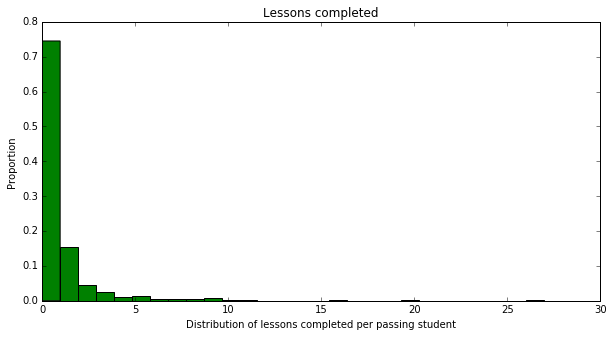

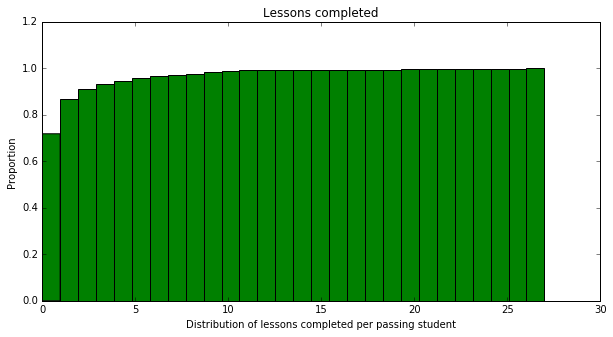

In [67]:
#Lessons completed, not passed

histogram(non_passing_engagement_grouped,'lessons_completed',
          'Distribution of lessons completed per passing student','Lessons completed')
histogram(non_passing_engagement_grouped,'lessons_completed',
          'Distribution of lessons completed per passing student','Lessons completed',cumu=True)

Very right-skewed/positive distribution. About 75% of the non-passing students did not complete any lessons. This is high, but not that surprising.

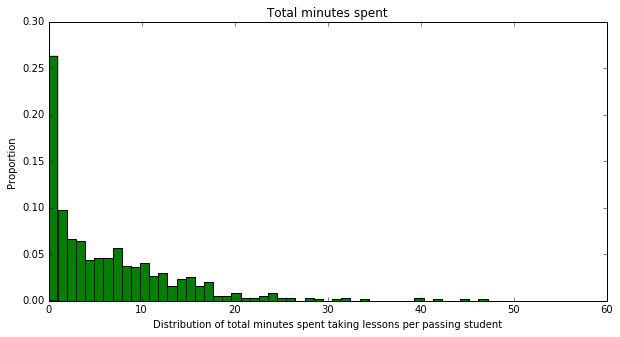

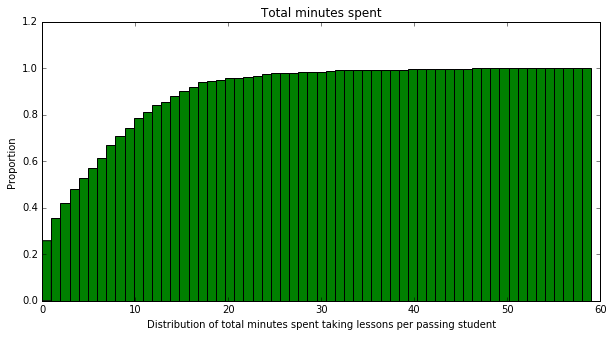

In [68]:
#hours spent, passing students
histogram((passing_engagement_grouped),'total_minutes_visited',
          'Distribution of total minutes spent taking lessons per passing student',
          'Total minutes spent',divider=60)
histogram((passing_engagement_grouped),'total_minutes_visited',
          'Distribution of total minutes spent taking lessons per passing student',
          'Total minutes spent',divider=60,cumu=True)

Right-skewed/positive distribution. 27% of the passing students spent between 0 and 1 hour taking lessons. About 25% spent more than 10 hours taking lessons before passing the first project.

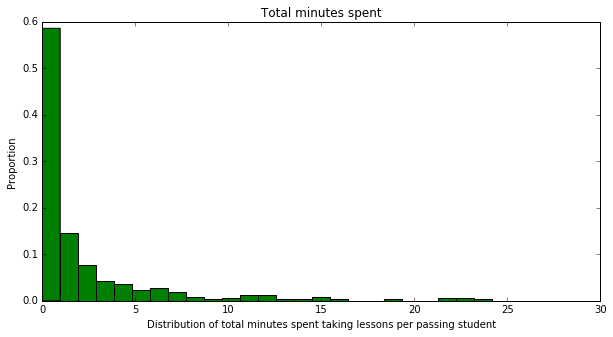

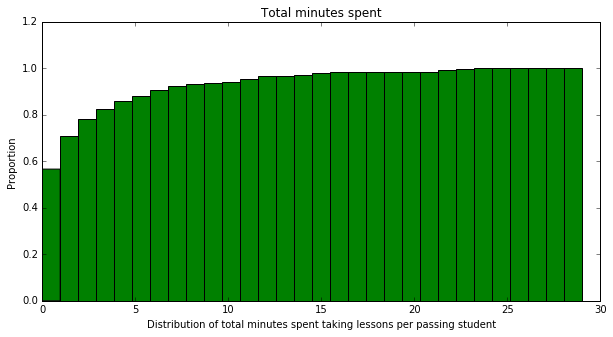

In [69]:
#hours spent, non-passing students
histogram((non_passing_engagement_grouped),'total_minutes_visited',
          'Distribution of total minutes spent taking lessons per passing student',
          'Total minutes spent',divider=60)
histogram((non_passing_engagement_grouped),'total_minutes_visited',
          'Distribution of total minutes spent taking lessons per passing student',
          'Total minutes spent',divider=60,cumu=True)

Right-skewed/positive distribution. Almost 60% of the non-passing students spent less than an hour taking lessons.

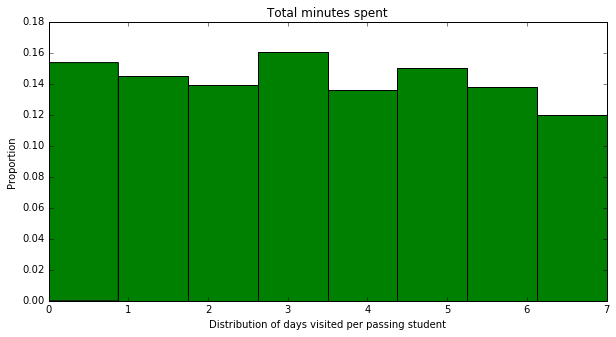

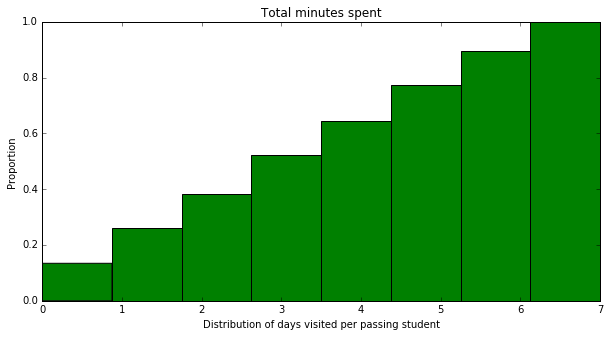

In [70]:
#days visited, passing students
histogram(passing_engagement_grouped,'has_visited',
          'Distribution of days visited per passing student',
          'Total minutes spent')
histogram(passing_engagement_grouped,'has_visited',
          'Distribution of days visited per passing student',
          'Total minutes spent',cumu=True)

Uniform distribution. It varied greatly how many days the students spent taking lessons, and no amount of days had a student share greater than 16% (4 days), or lower than 12% (7 days).

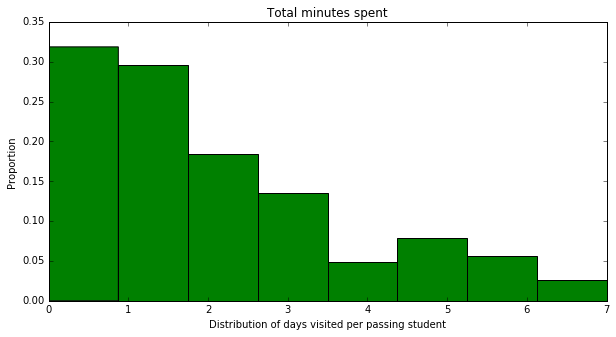

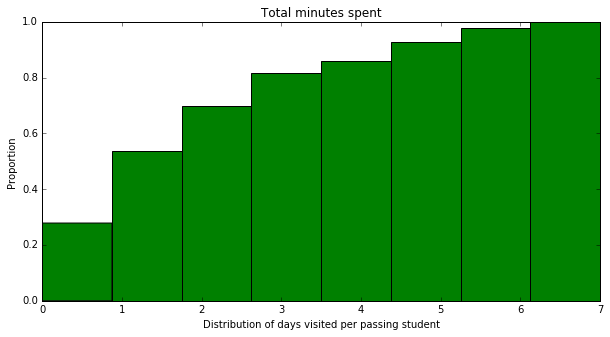

In [71]:
#days visited, non-passing students
histogram(non_passing_engagement_grouped,'has_visited',
          'Distribution of days visited per passing student',
          'Total minutes spent')
histogram(non_passing_engagement_grouped,'has_visited',
          'Distribution of days visited per passing student',
          'Total minutes spent',cumu=True)

Right-skewed/positive distribution. About 50% of the non-passing students spent spent 1 or less days taking lessons.

#Are your results just noise?

Since the results have not been tested for statistical significance, we consider them tentative (they haven't been validated.

#Correlation does not imply causation

**Correlation:**
Students who pass the first project are more likely to visit the classroom multiple times in their first week.
**Causation:**
Does visiting the classroom multiple times cause students to pass their project?
(It's plausible, but we can't be sure based on the available data)

**Third factors**
- Level of interest (they come back due to interest)
- Background knowledge (they do not come back because they lack programming experience)

"Or this **could** be because of causation! we just don't know."

#Predicting based on many features

Which students are likely to pass their first project?
- Could take a first pass using heuritics, but getting a really good prediction this way could be difficult
    - Lots of different pieces of information to look at
        - even more than we have done already
    - These features can interact
- **Machine learning** can make predictions automatically
    - usually a lot better than making predictions by hand
    - Some algorithms gives a ranked list of most important features for the prediction

#Communication

What findings are most interesting? How will you present them?
- Difference in total minutes
    - Report average minutes
- Difference in days visited
    - Show histograms
        - Polish any visualizations which will be shown to others
            - Make them look nicer and explain what trends you are noticing


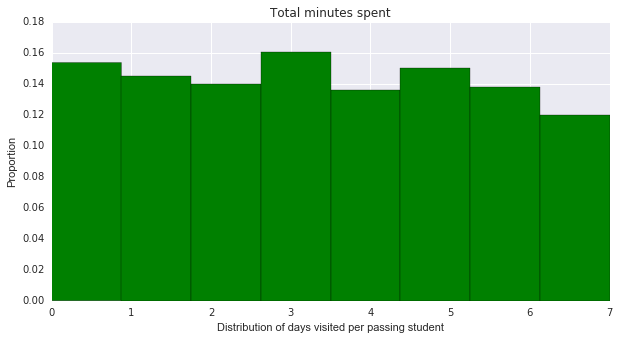

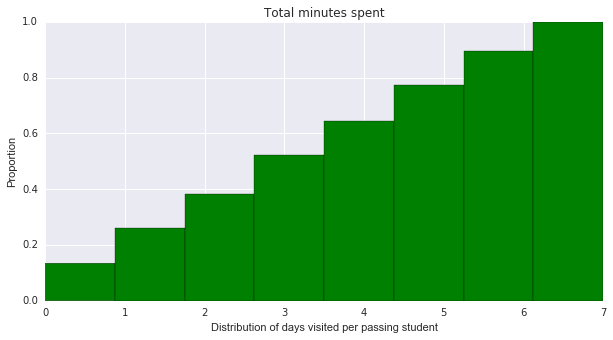

In [72]:
#Quiz: Improving plots and sharing findings

import seaborn as sns

histogram(passing_engagement_grouped,'has_visited',
          'Distribution of days visited per passing student',
          'Total minutes spent')
histogram(passing_engagement_grouped,'has_visited',
          'Distribution of days visited per passing student',
          'Total minutes spent',cumu=True)

(array([ 0.15367631,  0.14484434,  0.13954515,  0.16074189,  0.13601236,
         0.15014352,  0.13777876,  0.12011482]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

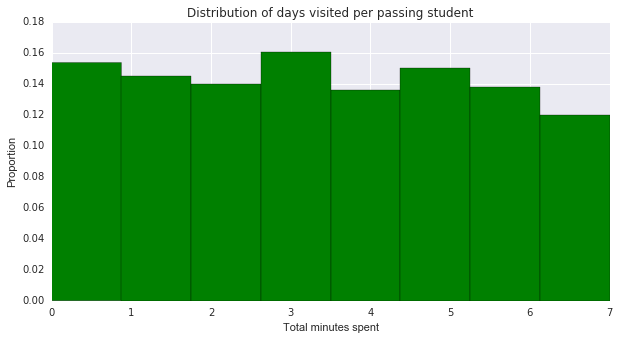

In [73]:
          
grouped_values = list(sum_grouped_items(passing_engagement_grouped,'has_visited').values())

min_val = int(min(grouped_values))
max_val = int(max(grouped_values))

plt.figure(figsize=(10,5))
plt.title('Distribution of days visited per passing student')
plt.xlabel('Total minutes spent')
plt.ylabel('Proportion')
#plt.ylabel('some numbers')

plt.hist(grouped_values,range=[min_val,max_val],
bins=max_val+1,color='g',normed=True,histtype='bar')
